In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [92]:
#Importing house price data into data frame
housing_data = pd.read_csv("train.csv")

In [93]:
#Inspecting data frame
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
#Data Exploration
#all numeric (float and int) variables in the dataset
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


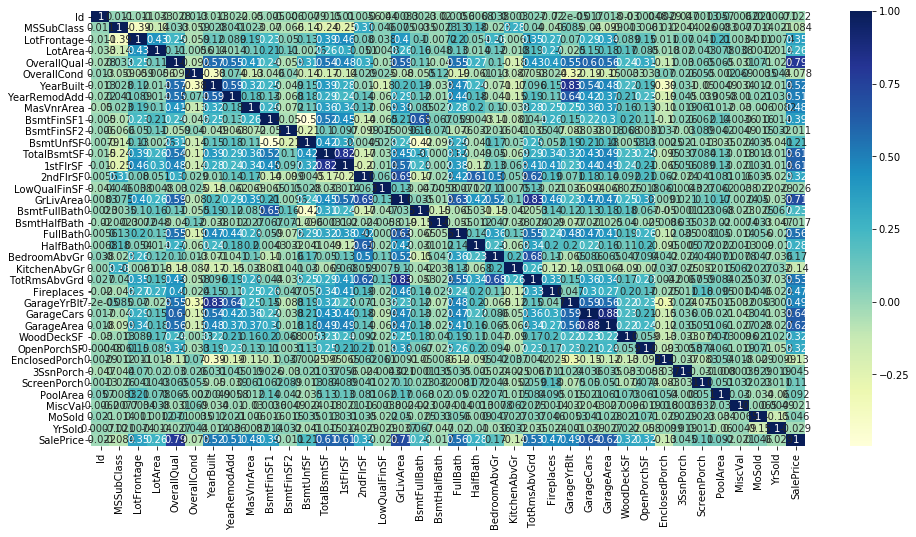

In [95]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(housing_data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [96]:
#Data Cleaning
#Inspecting master data frame dimesnions and size
print(housing_data.shape)
print(housing_data.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [97]:
#Inspecting column wise total null values
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [98]:
#Inspecting column wise percentage of null values
round(100*(((housing_data.isnull()).sum())/len(housing_data.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [99]:
#Dropping columns from master data frame with more than 80% null values
housing_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [100]:
#Again Inspecting column wise percentage of null values
round(100*(((housing_data.isnull()).sum())/len(housing_data.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [101]:
#Inspecting  number of rows with more than 5 missing values
len(housing_data[housing_data.isnull().sum(axis=1)>5].index)

98

In [102]:
#Inspecting null values percentage of rows
round(100*(len(housing_data[housing_data.isnull().sum(axis=1)>4].index)/len(housing_data.index)),2)

7.6

In [103]:
# Removing all the rows with null values greater than 5
housing_data=housing_data[housing_data.isnull().sum(axis=1)<=5]

In [104]:
#Inspecting master data frame after cleaning all null value rows.
round(100*((housing_data.isnull().sum())/len(housing_data.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.06
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.59
MasVnrArea        0.59
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.44
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      43.76
GarageType        0.51
GarageYrBlt       0.51
GarageFinis

In [105]:
#Dropping few more columns with null values greater than 40%
housing_data.drop(['FireplaceQu','LotFrontage','Id'],axis=1,inplace=True)

In [106]:
# Removing Nulls in certain columns which contain more than 0.5% of null values
housing_data=housing_data[~housing_data['MasVnrType'].isnull()]
housing_data=housing_data[~housing_data['MasVnrArea'].isnull()]
housing_data=housing_data[~housing_data['BsmtExposure'].isnull()]
housing_data=housing_data[~housing_data['BsmtFinType1'].isnull()]
housing_data=housing_data[~housing_data['BsmtFinType2'].isnull()]
housing_data=housing_data[~housing_data['Electrical'].isnull()]
housing_data=housing_data[~housing_data['GarageType'].isnull()]
housing_data=housing_data[~housing_data['GarageYrBlt'].isnull()]
housing_data=housing_data[~housing_data['GarageFinish'].isnull()]
housing_data=housing_data[~housing_data['GarageQual'].isnull()]
housing_data=housing_data[~housing_data['GarageCond'].isnull()]

In [107]:
#Inspecting master data frame after cleaning all null value rows.
round(100*((housing_data.isnull().sum())/len(housing_data.index)),2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [108]:
#Inspecting total no of available rows without any null values.
housing_data.shape

#Left with 1338 data points to build the model on and 75 features to predict their impact on house price

(1338, 74)

In [109]:
# Inspecting the cleaned master dataframe
print(housing_data.info())
print(housing_data.describe())

#From below result we can see that we have a good number of measurable features and rest all are categorical variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-null object
MasVnrArea       1338 non

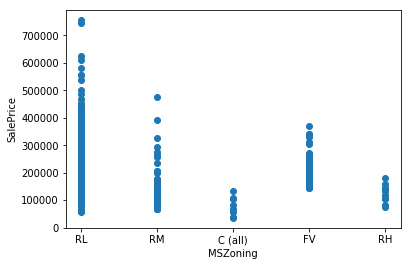

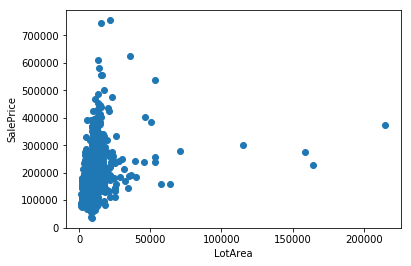

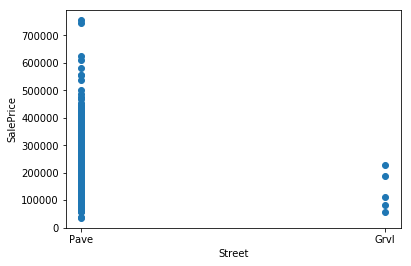

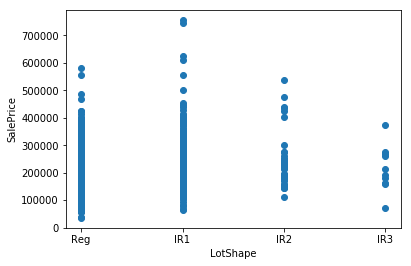

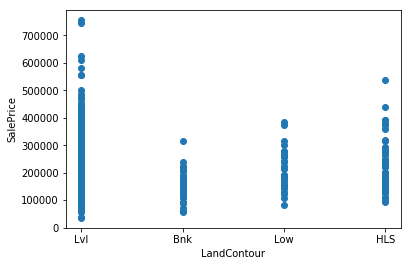

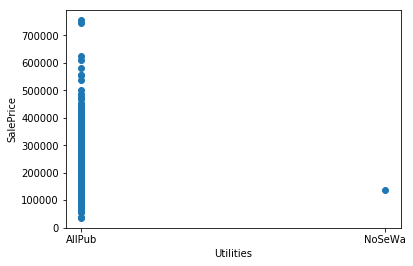

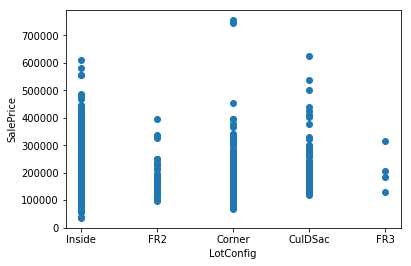

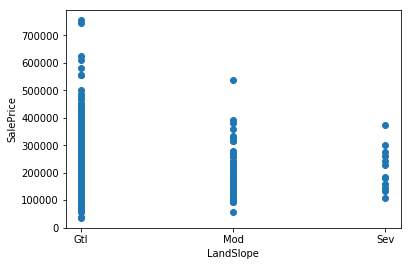

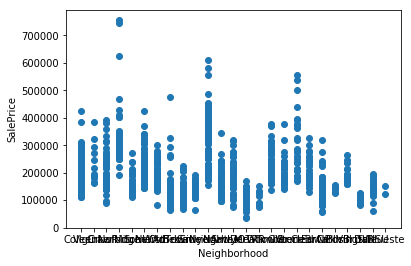

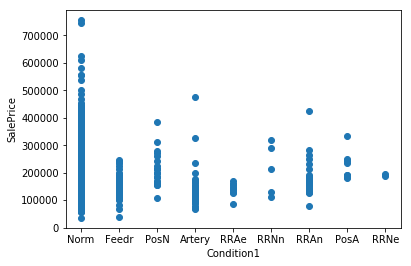

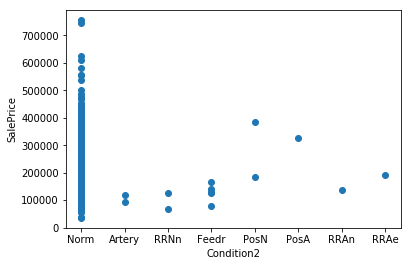

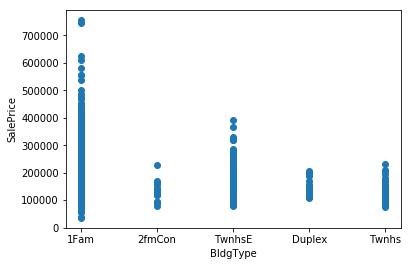

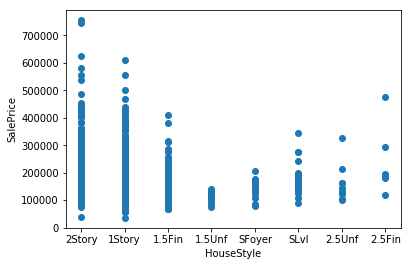

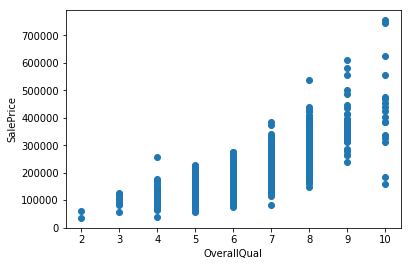

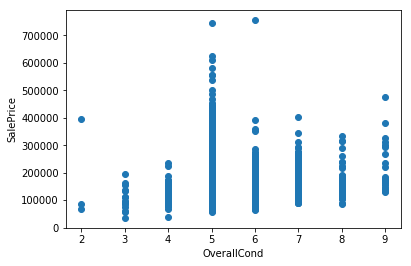

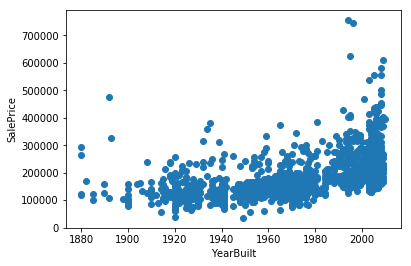

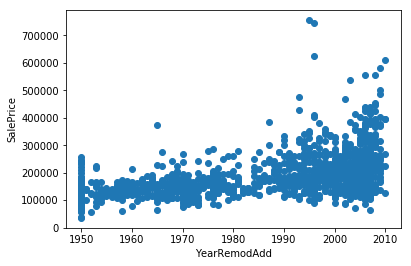

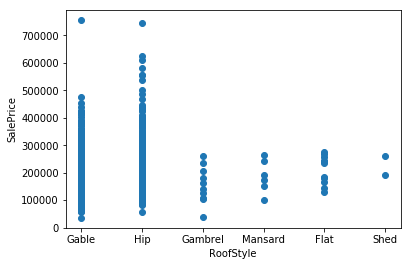

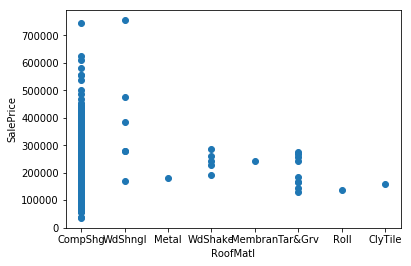

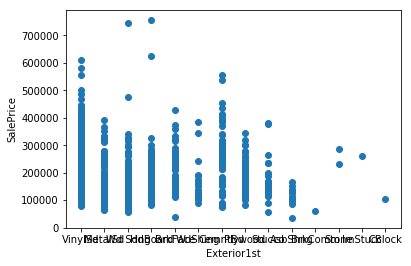

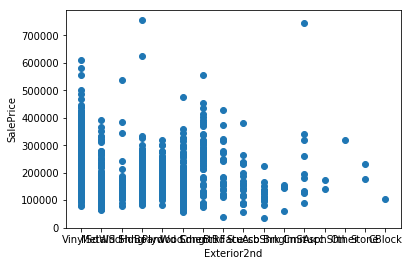

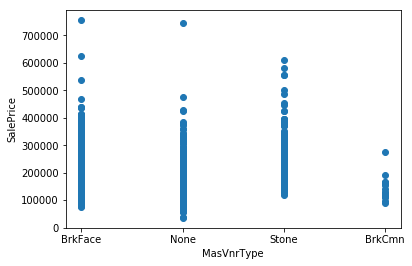

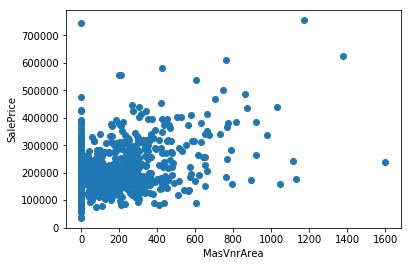

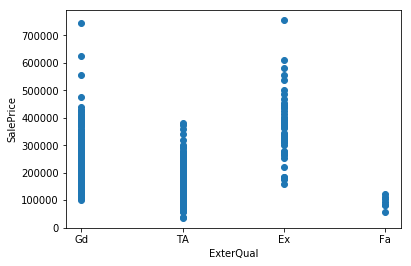

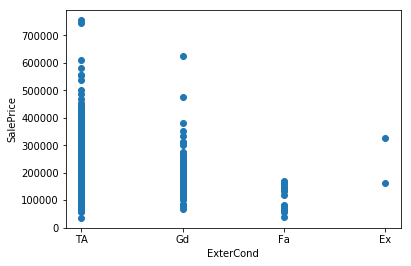

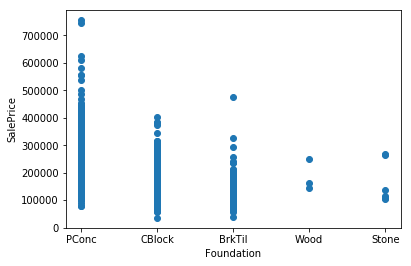

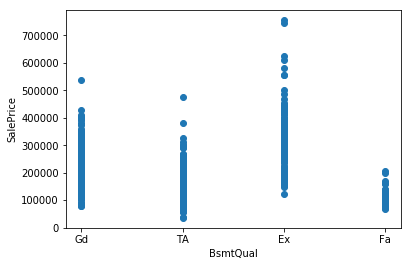

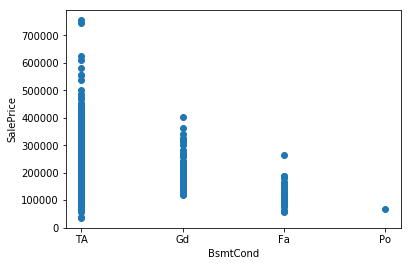

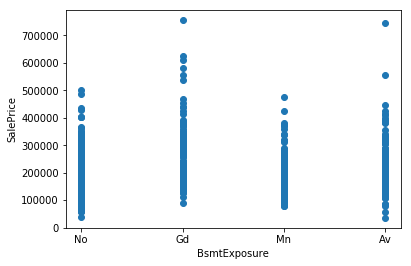

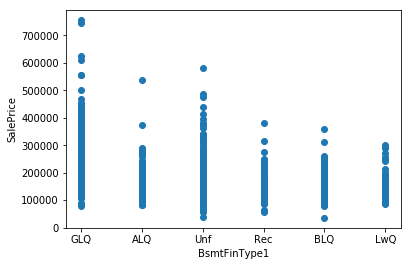

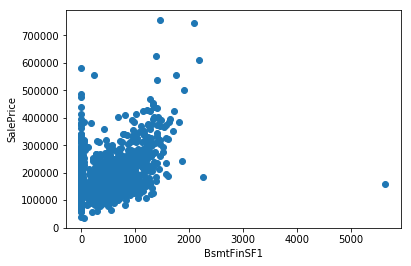

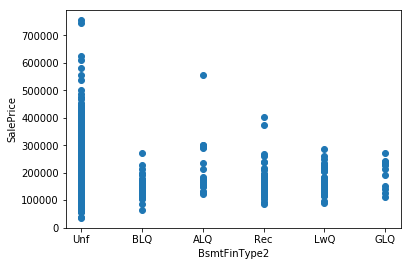

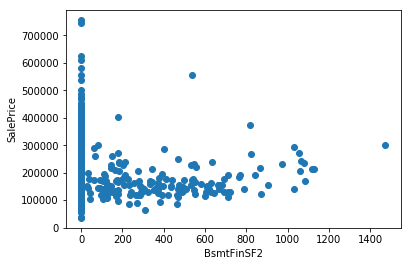

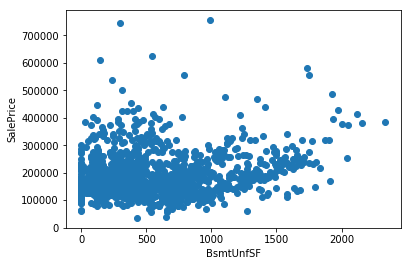

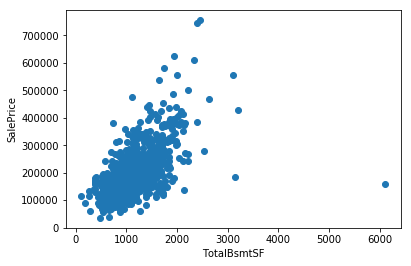

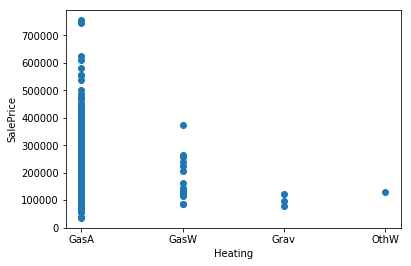

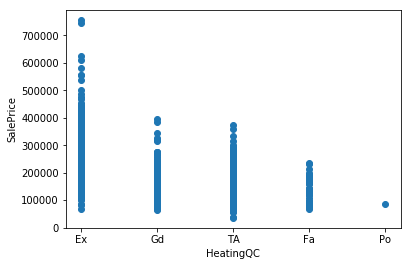

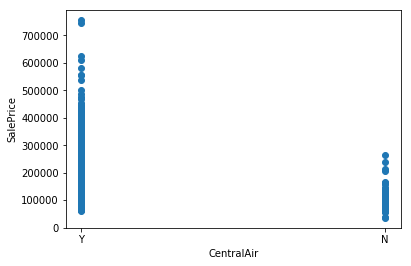

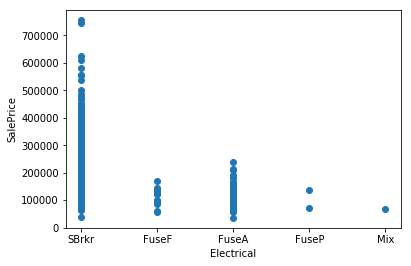

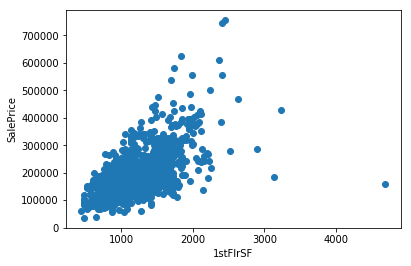

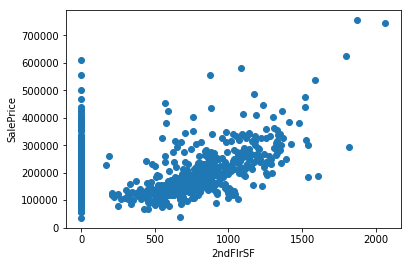

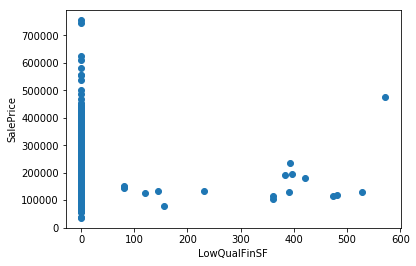

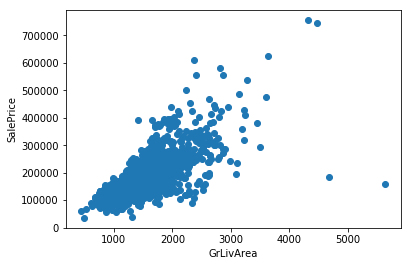

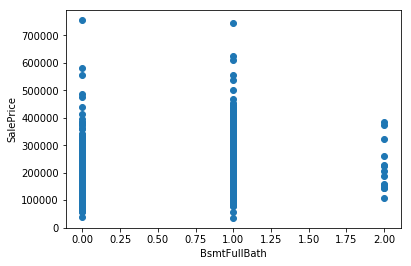

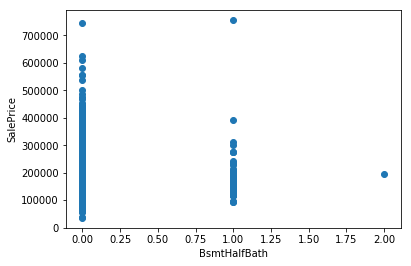

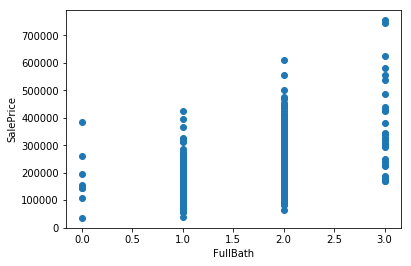

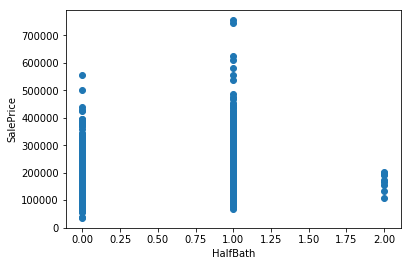

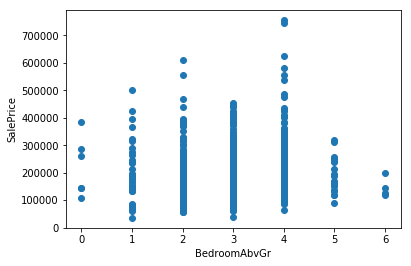

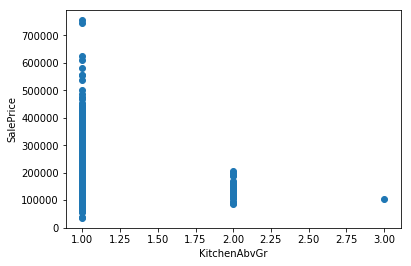

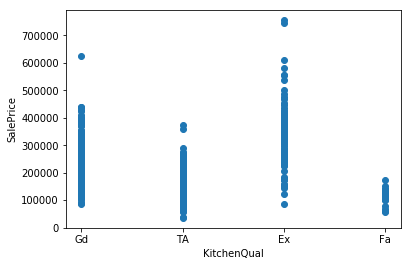

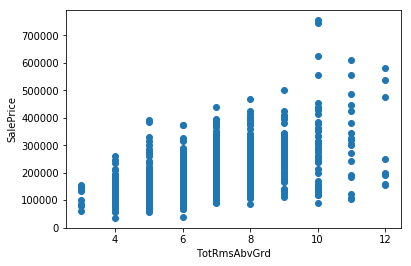

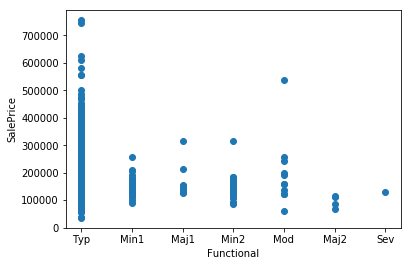

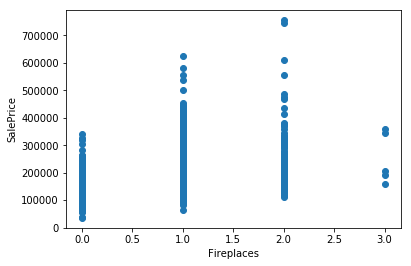

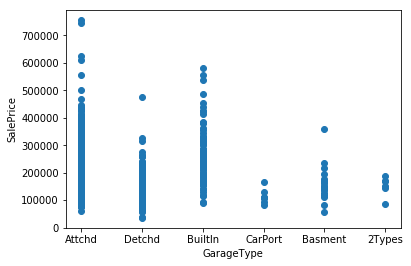

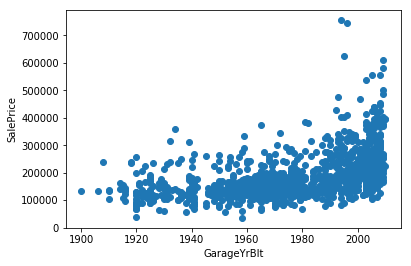

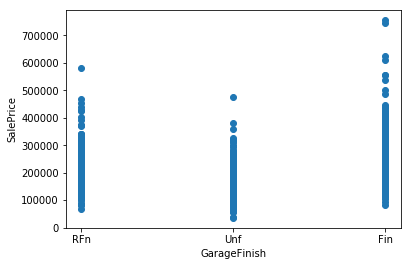

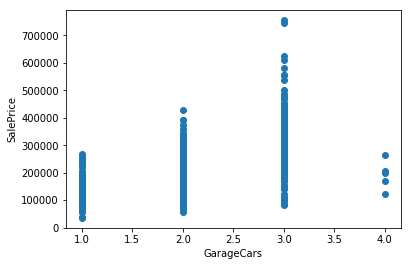

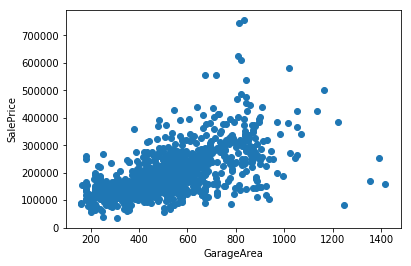

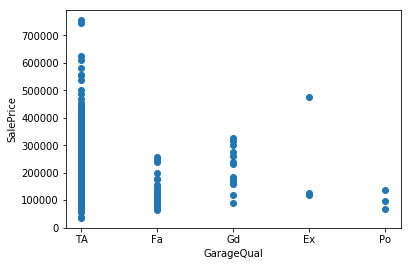

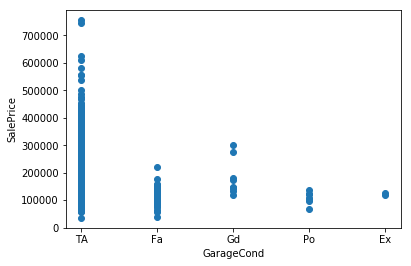

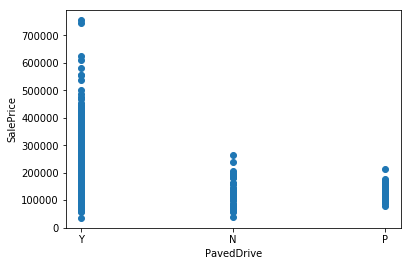

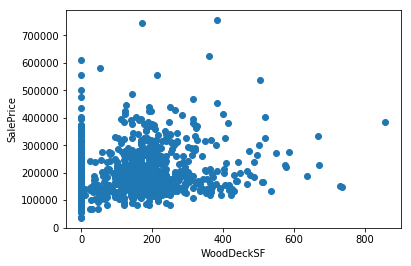

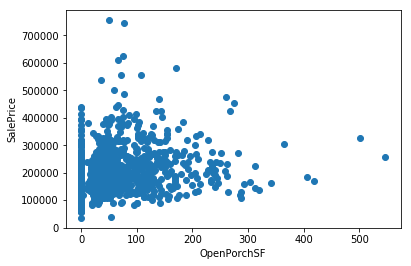

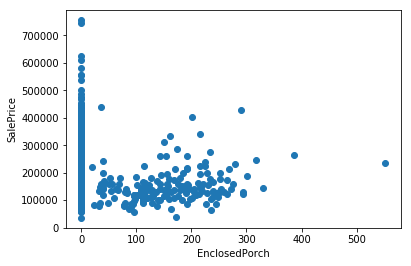

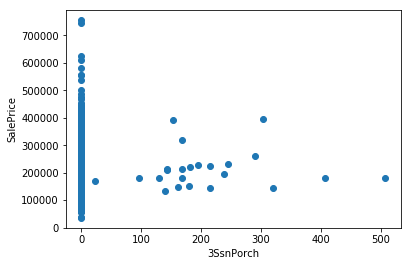

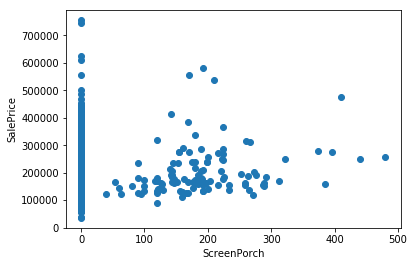

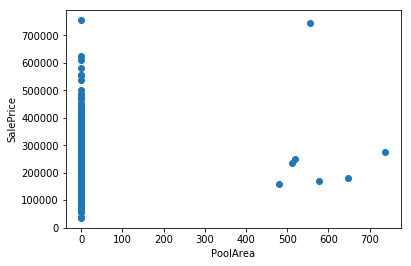

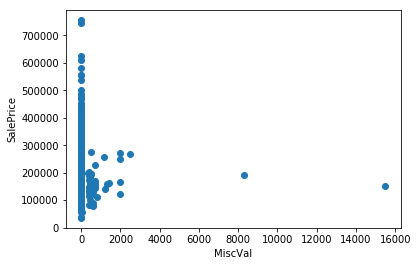

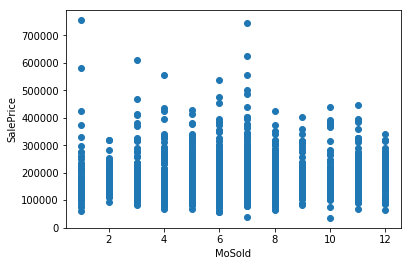

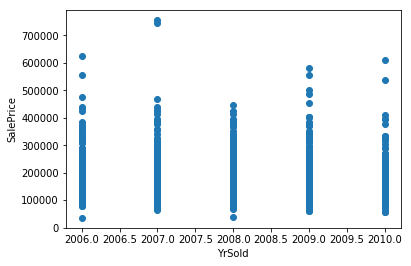

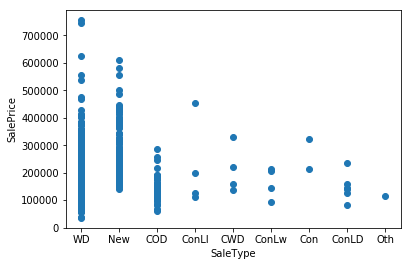

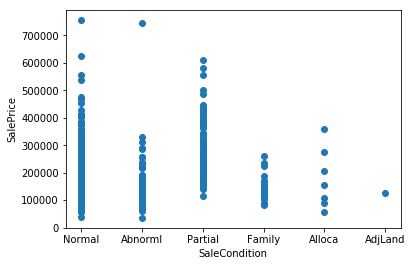

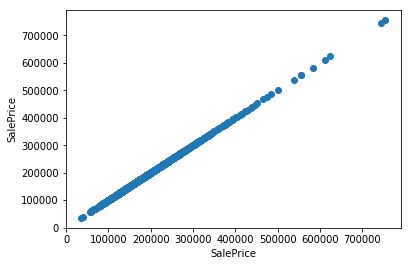

In [110]:
#Plotting house price with all other columns to study the impact of each variable
plt.figure()
for col in range(1, housing_data.shape[1]):
    plt.scatter(housing_data.iloc[:, col],housing_data["SalePrice"])
    plt.xlabel(housing_data.columns[col])
    plt.ylabel("SalePrice")
    plt.show()

In [111]:
# split into X and y
Y = housing_data.loc[:, 'SalePrice']
X = housing_data.loc[:, housing_data.columns != 'SalePrice']

In [112]:
# creating dummy variables for categorical variables
#subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [113]:
#Mapping all categorical features with [Yes/No] to corresponding numerical output (Yes:1 and No:0)
X['CentralAir']=X['CentralAir'].map({'Y' : 1, 'N' : 0})

In [114]:
# Creating Dummy Variables for categorical variables with more than two levels
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [115]:
# Dropping the repeated columns for which we created dummy variables above.
X = X.drop(list(housing_categorical.columns), axis=1)

In [116]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [117]:
# scaling the features
from sklearn.preprocessing import 

scaler = StandardScaler()
##scaler.fit(X)

In [118]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=1)

In [119]:
housing_data_numeric.drop(['Id', 'LotFrontage', 'SalePrice'],axis=1,inplace=True)

In [128]:
#pplying Linear Regression
# linear regression
X_train[housing_data_numeric.columns] = scaler.fit_transform(X_train[housing_data_numeric.columns])
X_test[housing_data_numeric.columns] = scaler.transform(X_test[housing_data_numeric.columns])


In [129]:
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [131]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120722,0.015717,0.000000,0.000000,0.001,{'alpha': 0.001},0.846771,0.534768,0.886609,0.039101,...,0.576876,0.303234,5,0.951804,0.944040,0.944464,0.946021,0.948847,0.947035,0.002920
1,0.203933,0.142624,0.000813,0.000768,0.01,{'alpha': 0.01},0.846786,0.534809,0.886683,0.041048,...,0.577340,0.302560,4,0.951804,0.944040,0.944464,0.946021,0.948847,0.947035,0.002920
2,0.117083,0.017826,0.000000,0.000000,1,{'alpha': 1.0},0.847846,0.543778,0.890613,0.080870,...,0.592671,0.289231,3,0.951709,0.943956,0.944408,0.945944,0.948760,0.946956,0.002911
3,0.076298,0.017490,0.000000,0.000000,5,{'alpha': 5.0},0.851935,0.559014,0.901367,0.221463,...,0.638886,0.243056,2,0.950341,0.942973,0.943428,0.944791,0.947376,0.945782,0.002747
4,0.063801,0.028068,0.003124,0.006249,10,{'alpha': 10.0},0.859411,0.559469,0.909262,0.357739,...,0.681456,0.202402,1,0.948134,0.941832,0.940997,0.942949,0.945339,0.943850,0.002592


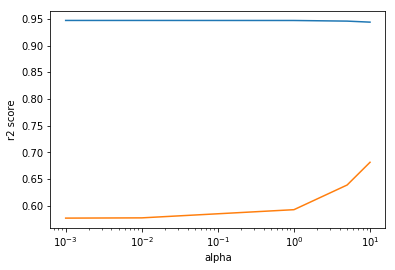

In [132]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [135]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=10)
lm.fit(X_train, Y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

0.9391095534057122
0.765860375131427
